In [1]:
import numpy as np 
import cv2 as cv 
import sklearn 
from matplotlib import pyplot as plt 
import tensorflow as tf 
import keras 
import seaborn
from IPython import display

2024-06-12 07:50:33.847247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-12 07:50:33.847354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-12 07:50:33.942524: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
def get_file_path(directory, filename):
    return os.path.join(directory, filename)

In [3]:
def plot_images(images):
    rows = 3
    cols = 3
    fig, axes = plt.subplots(rows, cols, figsize=(8, 8))
    #plotting images
    for i in range(rows):
        for j in range(cols):
            axes[i, j].imshow(images[i * cols + j], cmap='gray')
            axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Preparing Train

In [4]:
import os

In [5]:
train_path=r'/kaggle/input/finger-print-dataset/Dataset/train'
files=os.listdir(train_path)
print('Train image data loading')
Train_data=[]
for file in files:
    image_path=get_file_path(train_path,file)
    img=cv.imread(image_path)
    Train_data.append(img)
print("Data loading Completed")
Train_data=np.array(Train_data)



Train image data loading
Data loading Completed


In [6]:
#normalizing between[-1,1]
Train_data=Train_data/255

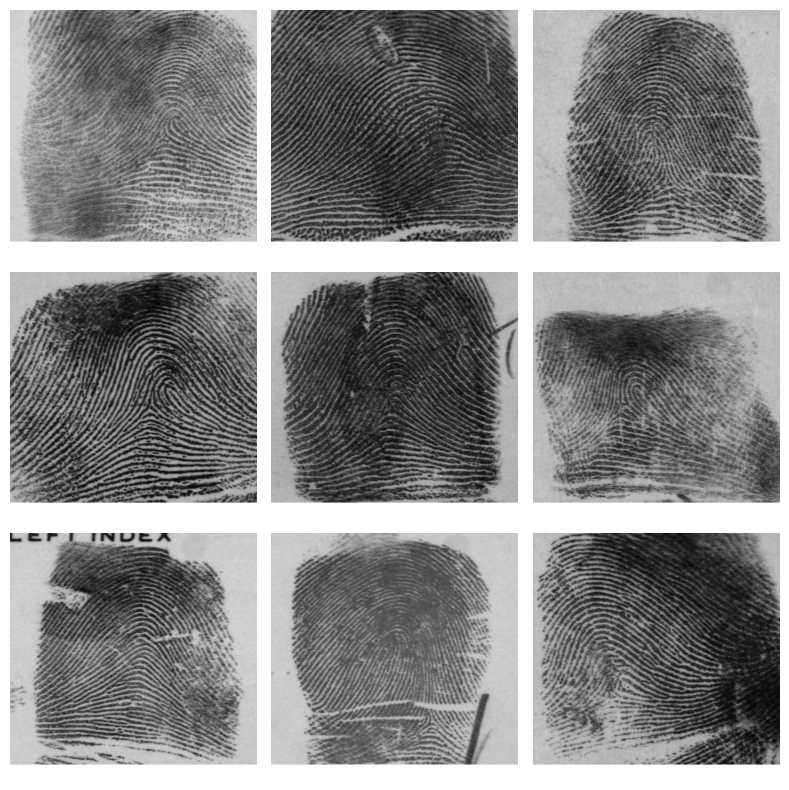

In [7]:
plot_images(Train_data)

In [8]:
enhance_path=r'/kaggle/input/finger-print-dataset/Dataset/enhace_train'
files=os.listdir(enhance_path)
print('Enhanced image data loading')
E_Train_data=[]
for file in files:
    image_path=get_file_path(enhance_path,file)
    img=cv.imread(image_path)
    img=cv.resize(img,(256,256))
    E_Train_data.append(img)
print("Data loading Completed")
E_Train_data=np.array(E_Train_data)




Enhanced image data loading
Data loading Completed


In [9]:

E_Train_data=E_Train_data/255

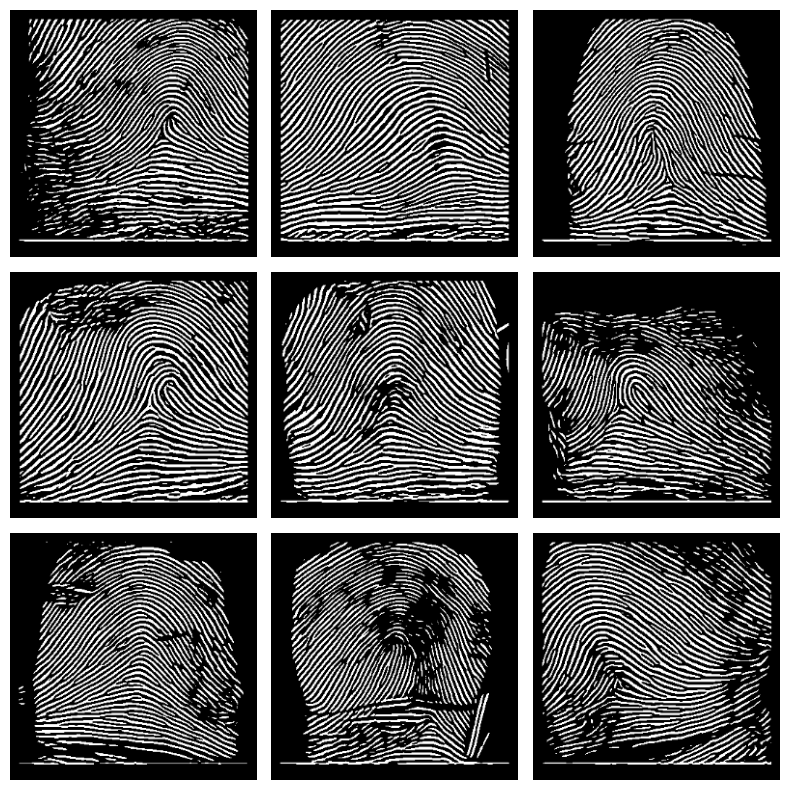

In [10]:
plot_images(E_Train_data)

In [11]:
Train_data.shape

(3500, 512, 512, 3)

In [12]:
Train_data=Train_data[4:]

In [13]:
Train_data.shape

(3496, 512, 512, 3)

In [14]:
E_Train_data.shape

(3496, 256, 256, 3)

# APPLYING GAN

In [15]:
def generator_model():
    
     #generator model 
    input=tf.keras.layers.Input(shape=(512,512,3))
    x=tf.keras.layers.Conv2D(128,(5,5),strides=(1,1),padding='same',activation='relu',use_bias=False)(input)
    x=tf.keras.layers.Conv2D(128,(5,5),strides=(2,2),padding='same',activation='relu',use_bias=False)(x)
    
    x=tf.keras.layers.Conv2D(64,(5,5),strides=(1,1),padding='same',activation='relu',use_bias=False)(x)
    x=tf.keras.layers.Conv2D(64,(5,5),strides=(2,2),padding='same',activation='relu',use_bias=False)(x)
    
    x=tf.keras.layers.Conv2D(32,(5,5),strides=(1,1),padding='same',activation='relu',use_bias=False)(x)
    x=tf.keras.layers.Conv2D(32,(5,5),strides=(2,2),padding='same',activation='relu',use_bias=False)(x)
    
    x=tf.keras.layers.Conv2DTranspose(32,(5,5),strides=(1,1),padding='same',activation='relu')(x)
    x=tf.keras.layers.Conv2DTranspose(32,(5,5),strides=(2,2),padding='same',activation='relu',use_bias=False)(x)
    
    x=tf.keras.layers.Conv2DTranspose(64,(5,5),strides=(1,1),padding='same',activation='relu')(x)
    x=tf.keras.layers.Conv2DTranspose(64,(5,5),strides=(2,2),padding='same',activation='relu',use_bias=False)(x)
    
    output=tf.keras.layers.Conv2DTranspose(3,(5,5),strides=(1,1),padding='same',use_bias=False ,activation='sigmoid')(x)

    return tf.keras.Model(inputs=input,outputs=output)


In [16]:
generator=generator_model() 
generator.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 512, 512, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 512, 512, 128)  │         9,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 128)  │       409,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 256, 256, 64)   │       204,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 64)   │       102,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │        51,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 32)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 64, 64, 32)     │        25,632 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 128, 128, 32)   │        25,600 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 128, 128, 64)   │        51,264 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 256, 256, 64)   │       102,400 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 256, 256, 3)    │         4,800 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,012,896 (3.86 MB)

 Trainable params: 1,012,896 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

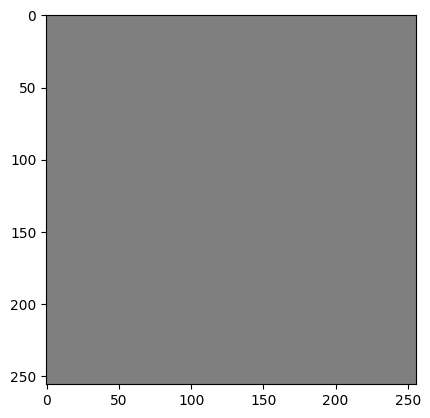

In [17]:
#use for a single instance
img_batch = np.expand_dims(Train_data[0], axis=0)
generated_image=generator(img_batch,training=False) 
plt.imshow(generated_image[0],cmap='gray')

In [18]:
def discriminator_model():

    input=tf.keras.layers.Input(shape=(256,256,3))
    x=tf.keras.layers.Conv2D(32,(5,5),strides=(2,2),padding='same')(input)
    x=tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x=tf.keras.layers.Dropout(0.3)(x)
    
    x=tf.keras.layers.Conv2D(64,(5,5),strides=(2,2),padding='same')(x)
    x=tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x=tf.keras.layers.Dropout(0.3)(x)

    x=tf.keras.layers.Conv2D(128,(5,5),strides=(2,2),padding='same')(x)
    x=tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x=tf.keras.layers.Dropout(0.3)(x)

    x=tf.keras.layers.Flatten()(x)
    output=tf.keras.layers.Dense(1,activation='sigmoid')(x)

    return tf.keras.Model(inputs=input,outputs=output)

In [19]:
discriminator=discriminator_model()
discriminator.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       131,073 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 389,697 (1.49 MB)

 Trainable params: 389,697 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
decision=discriminator(generated_image)
print(decision)

tf.Tensor([[0.49280283]], shape=(1, 1), dtype=float32)


# Create Custom Loss Functions

# Adversial Loss

In [21]:
cross_entropy=tf.keras.losses.BinaryCrossentropy()

In [22]:
def discriminator_loss(real_output,fake_output):
    real_loss=cross_entropy(tf.ones_like(real_output),real_output)
    fake_loss=cross_entropy(tf.zeros_like(fake_output),fake_output)
    total_loss=real_loss+fake_loss 
    return total_loss 

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output),fake_output)

# Reconstruction Loss

In [23]:
import tensorflow as tf

def reconstruction_loss(image1, image2):
    mse_total = mse(image1, image2)
    return mse_total / tf.cast(tf.shape(image1)[0], tf.float32)  # Divide by batch size

def mse(image1, image2):
    image1 = tf.cast(image1, tf.float32)
    image2 = tf.cast(image2, tf.float32)
    # Cast image1 to float32
    mse = tf.reduce_mean(tf.square(image1 - image2))
    return mse


# Orientation Loss

In [24]:
def orientation_loss(image1,image2):
    ori_total=0 
    for i,j in zip(image1,image2):
        ori_total+=orientation(i,j)
    return ori_total/len(image1)
    

def orientation(image1,image2):
    detector = cv2.ORB_create()
    keypoints1, descriptors1 = detector.detectAndCompute(image1, None)
    keypoints2, descriptors2 = detector.detectAndCompute(image2, None)

    # Match keypoints between the images
    matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
    matches = matcher.match(descriptors1, descriptors2)

    orientation_difference = 0
    for match in matches:
        kp1 = keypoints1[match.queryIdx]
        kp2 = keypoints2[match.trainIdx]
        orientation_difference += abs(kp1.angle - kp2.angle)

    average_orientation_difference = orientation_difference / len(matches)
    
    return average_orientation_difference



In [25]:
gen_optimezer=tf.keras.optimizers.Adam(1e-4)
disc_optimezer=tf.keras.optimizers.Adam(1e-4)

In [26]:
@tf.function 
# causes the function to be compiled 
def train_step(real_images,images,l1):

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images=generator(real_images,training=True)

        real_output=discriminator(images,training=True)
        fake_output=discriminator(generated_images,training=True)
        
#         gen_loss=generator_loss(fake_output)+(l1*reconstruction_loss(images, generated_images))+(l2*orientation_loss(images, generated_images))
        gen_loss=generator_loss(fake_output)+(l1*reconstruction_loss(images, generated_images))
        disc_loss=discriminator_loss(real_output,fake_output)
        

    gradients_of_generator=gen_tape.gradient(gen_loss,generator.trainable_variables)
    gradients_of_discriminator=disc_tape.gradient(disc_loss,discriminator.trainable_variables)

    gen_optimezer.apply_gradients(zip(gradients_of_generator,generator.trainable_variables))
    disc_optimezer.apply_gradients(zip(gradients_of_discriminator,discriminator.trainable_variables))

In [27]:
def generate_and_save_images(model, epoch, test_input):
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(9, 9))

  for i in range(predictions.shape[0]):
      plt.subplot(3, 3, i+1)
      plt.imshow(predictions[i, :, :, 0] * 255, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [28]:
import tensorflow as tf
import numpy as np

def train(dataset, dataset2, epochs, batch_size,test):
    num_batches = len(dataset) // batch_size
    
    for epoch in range(epochs):
        print("Epoch {} started".format(epoch + 1))
        for batch_index in range(num_batches):
            start_index = batch_index * batch_size
            end_index = start_index + batch_size
            image_batch = dataset[start_index:end_index]
            enhanced_batch = dataset2[start_index:end_index]
            train_step(image_batch, enhanced_batch,0.5)
        
        # Display generated images after each epoch
        display.clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, test)
        
        print("Epoch {} completed".format(epoch + 1))
    
    # Display final generated images
    display.clear_output(wait=True)
    generate_and_save_images(generator, epoch, test)



In [29]:
# train_images=tf.expand_dims(train_images,axis=1)

In [30]:
test_path=r'/kaggle/input/finger-print-dataset/Dataset/test'
files=os.listdir(test_path)
print('Test image data loading')
Test_data=[]
for file in files:
    image_path=get_file_path(test_path,file)
    img=cv.imread(image_path)
    Test_data.append(img)
print("Data loading Completed")
Test_data=np.array(Test_data)

Test image data loading
Data loading Completed


In [31]:
Test_data.shape

(500, 512, 512, 3)

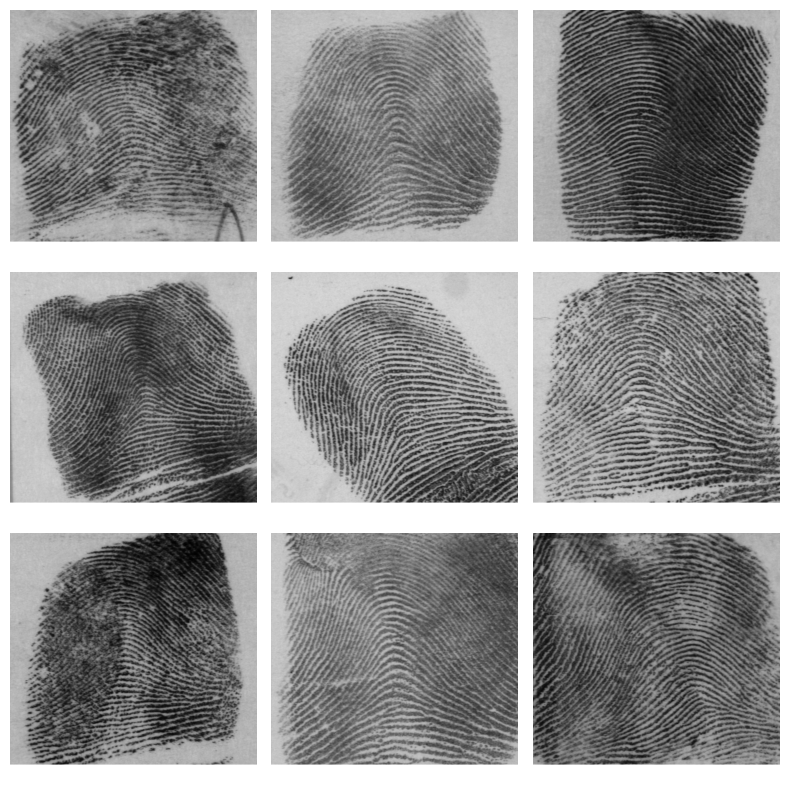

In [32]:
plot_images(Test_data)

In [33]:
# Test_data=Test_data/255

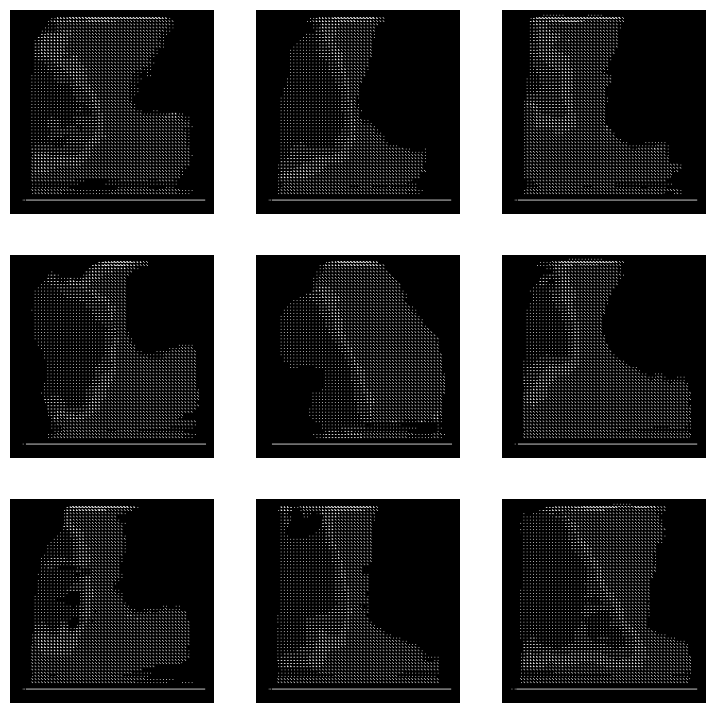

In [34]:
test_sample=Test_data[:9]
EPOCHS=10
batch_size=10
train(Train_data,E_Train_data,EPOCHS,batch_size,test_sample)

In [35]:
# image_path=r'/kaggle/working/image_at_epoch_0007.png'
# display.clear_output(wait=True)
# img=cv.imread(image_path)
# plt.imshow(img)